## Loading Data and libraries 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)

# Load the data
data = pd.read_csv("C:/Users/Kateryna.Tekmenzhi/OneDrive - Bellevue College/data.csv", sep=";")

## Exploring the raw data 

In [2]:
# Check basic information
print("Dataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)

Dataset shape: (4424, 37)

Data types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date          

4,424 student records with 37 variables each


In [3]:
# View first few rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2          

In [10]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                

Skewness of numerical variables:
Nacionality                                       10.703998
Educational special needs                          9.154976
Curricular units 1st sem (without evaluations)     8.207403
Curricular units 2nd sem (without evaluations)     7.267701
International                                      6.104830
Father's occupation                                5.395173
Mother's occupation                                5.339227
Curricular units 2nd sem (credited)                4.634820
Marital status                                     4.399764
Curricular units 1st sem (credited)                4.169049
Previous qualification                             2.871207
Debtor                                             2.434652
Age at enrollment                                  2.054988
Application order                                  1.881050
Curricular units 1st sem (enrolled)                1.619041
Scholarship holder                                 1.164871
Curricu

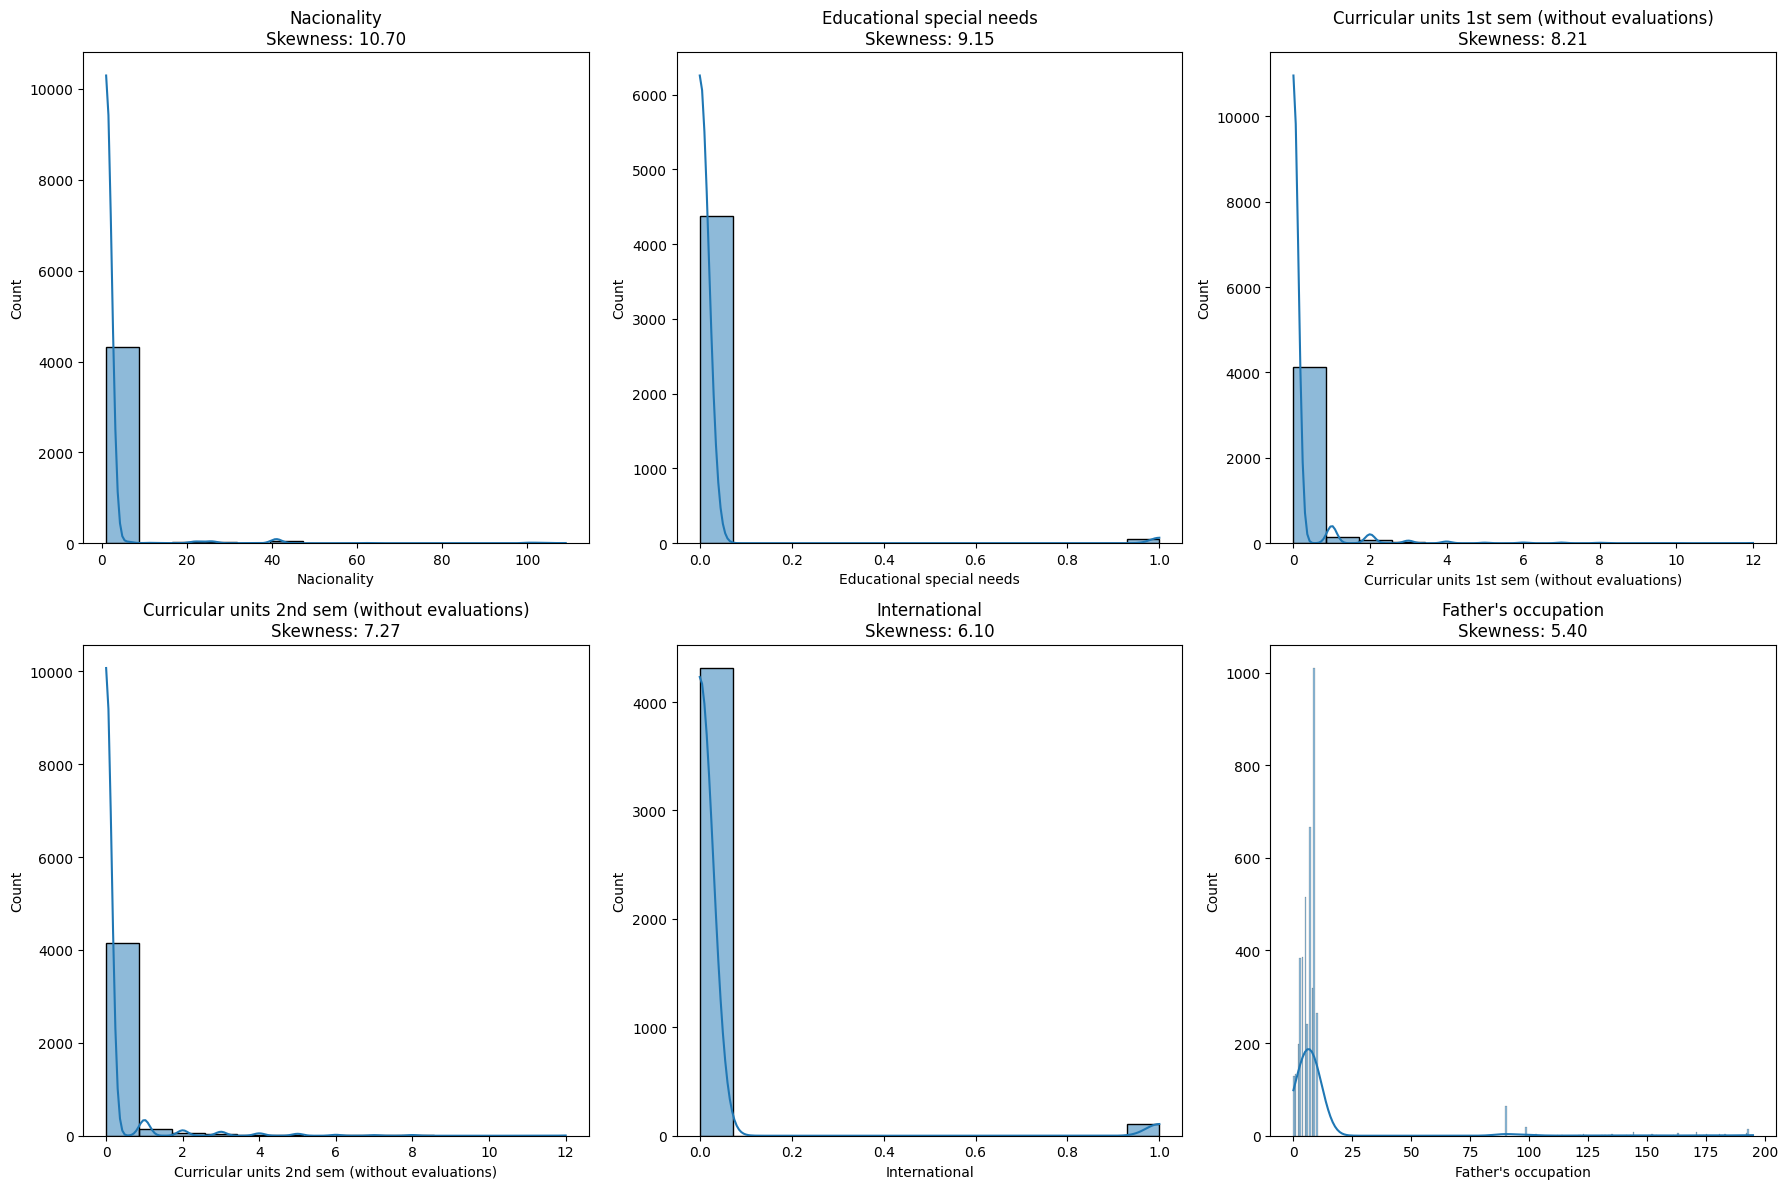

In [4]:
# Calculate skewness for all numeric variables
numeric_columns = data.select_dtypes(include=[np.number]).columns
skewness_values = data[numeric_columns].skew().sort_values(ascending=False)

print("Skewness of numerical variables:")
print(skewness_values)

# Plot histograms for the most skewed variables
plt.figure(figsize=(18, 12))
for i, column in enumerate(skewness_values.index[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f"{column}\nSkewness: {skewness_values[column]:.2f}")
plt.tight_layout()
plt.show()

Based on this initial skewness, I applied specific transformations to normalize the distributions as recommended by statistical guidelines (Tabachnick & Fidell, 2007; Howell, 2007):

- Logarithmic Transformation for Substantially Positively Skewed Variables
- 

Checking for outliers before transformation:
Marital status: 505 outliers (11.42% of data)
Application mode: 0 outliers (0.00% of data)
Application order: 541 outliers (12.23% of data)
Course: 442 outliers (9.99% of data)
Daytime/evening attendance	: 483 outliers (10.92% of data)
Previous qualification: 707 outliers (15.98% of data)
Previous qualification (grade): 179 outliers (4.05% of data)
Nacionality: 110 outliers (2.49% of data)
Mother's qualification: 0 outliers (0.00% of data)
Father's qualification: 0 outliers (0.00% of data)
Mother's occupation: 182 outliers (4.11% of data)
Father's occupation: 177 outliers (4.00% of data)
Admission grade: 86 outliers (1.94% of data)
Displaced: 0 outliers (0.00% of data)
Educational special needs: 51 outliers (1.15% of data)
Debtor: 503 outliers (11.37% of data)
Tuition fees up to date: 528 outliers (11.93% of data)
Gender: 0 outliers (0.00% of data)
Scholarship holder: 1099 outliers (24.84% of data)
Age at enrollment: 441 outliers (9.97% of d

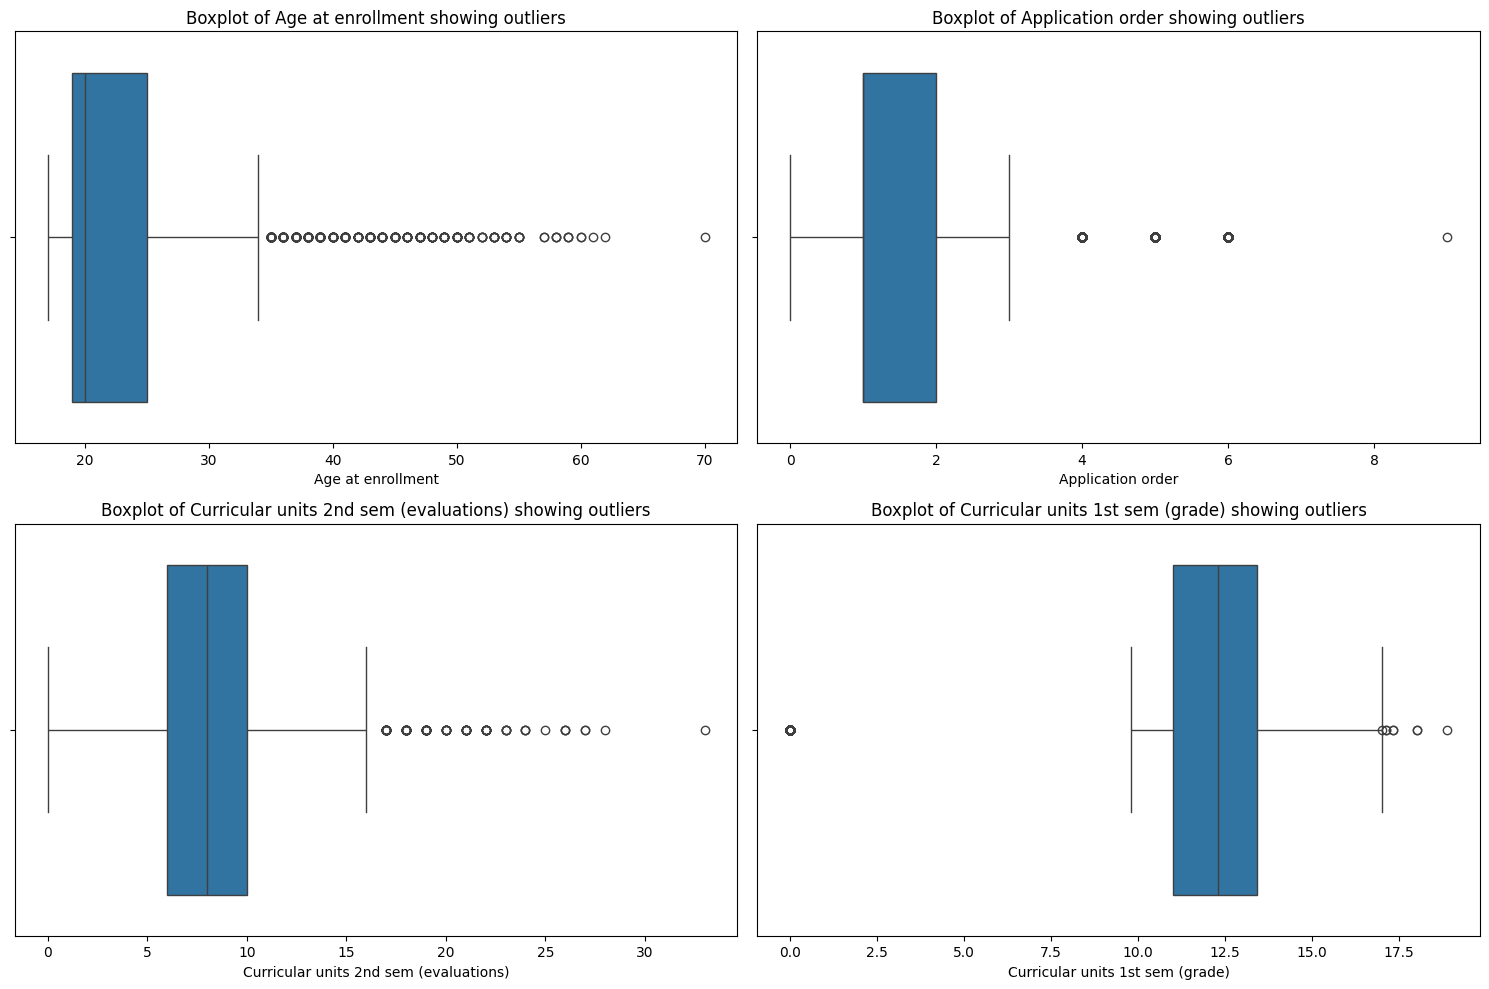

In [5]:
# Function to detect outliers using IQR method
def detect_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)][variable]
    
    return outliers

# Check for outliers in key numeric variables
print("Checking for outliers before transformation:")
numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_summary = {}
for col in numeric_columns:
    outliers = detect_outliers(data, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data)) * 100
    outlier_summary[col] = (outlier_count, outlier_percentage)
    
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}% of data)")

# Visualize outliers for a few key variables
def plot_boxplot_with_outliers(df, variables):
    n_vars = len(variables)
    plt.figure(figsize=(15, 5 * ((n_vars + 1) // 2)))
    
    for i, var in enumerate(variables):
        plt.subplot((n_vars + 1) // 2, 2, i+1)
        sns.boxplot(x=df[var])
        plt.title(f"Boxplot of {var} showing outliers")
        plt.tight_layout()
    
    plt.show()

# Select some variables with different skewness patterns to check
variables_to_check = [
    # Substantial positive skewness
    'Age at enrollment', 
    # Moderate positive skewness
    'Application order',
    # Low skewness
    'Curricular units 2nd sem (evaluations)',
    # Negative skewness
    'Curricular units 1st sem (grade)'
]

plot_boxplot_with_outliers(data, variables_to_check)


In [8]:

# ---------- PROCEED WITH TRANSFORMATIONS ----------

# Calculate skewness for all numeric variables
skewness_values = data[numeric_columns].skew().sort_values(ascending=False)
print("\nSkewness of numerical variables:")
print(skewness_values)

# Create a copy of the dataset for transformations
transformed_data = data.copy()

# Group variables by skewness levels
substantial_pos_skew_vars = [col for col in numeric_columns if data[col].skew() > 2.0]
moderate_pos_skew_vars = [col for col in numeric_columns if 0.5 < data[col].skew() <= 2.0]
low_skew_vars = [col for col in numeric_columns if -0.5 <= data[col].skew() <= 0.5]
mild_neg_skew_vars = [col for col in numeric_columns if -1.0 < data[col].skew() < -0.5]
substantial_neg_skew_vars = [col for col in numeric_columns if data[col].skew() <= -1.0]

# Apply transformations as before...
# [Same transformation code as in previous response]

# ---------- VERIFY TRANSFORMATIONS WITH RESPECT TO OUTLIERS ----------

# Function to check if transformation reduced the influence of outliers
def compare_outliers_before_after(original_var, transformed_var):
    # Original outliers
    original_outliers = detect_outliers(data, original_var)
    original_outlier_count = len(original_outliers)
    original_outlier_percentage = (original_outlier_count / len(data)) * 100
    
    # Transformed outliers
    transformed_outliers = detect_outliers(transformed_data, transformed_var)
    transformed_outlier_count = len(transformed_outliers)
    transformed_outlier_percentage = (transformed_outlier_count / len(data)) * 100
    
    reduction = original_outlier_percentage - transformed_outlier_percentage
    
    print(f"{original_var}:")
    print(f"  Before: {original_outlier_count} outliers ({original_outlier_percentage:.2f}%)")
    print(f"  After: {transformed_outlier_count} outliers ({transformed_outlier_percentage:.2f}%)")
    print(f"  Change: {reduction:.2f}% reduction in outliers")
    
    return reduction

print("\nVerifying effect of transformations on outliers:")

# Check a few examples from each transformation type
for var in substantial_pos_skew_vars[:3]:  # Check first 3 substantial positive skew variables
    transformed_var = f"{var}_log"
    if transformed_var in transformed_data.columns:
        compare_outliers_before_after(var, transformed_var)

for var in moderate_pos_skew_vars[:3]:  # Check first 3 moderate positive skew variables
    transformed_var = f"{var}_sqrt"
    if transformed_var in transformed_data.columns:
        compare_outliers_before_after(var, transformed_var)

for var in substantial_neg_skew_vars[:3]:  # Check first 3 substantial negative skew variables
    transformed_var = f"{var}_reflect_log"
    if transformed_var in transformed_data.columns:
        compare_outliers_before_after(var, transformed_var)

# Visualize transformation effect on distribution and outliers
def plot_transformation_effect(original_var, transformed_var, transformation_type):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Original histogram
    sns.histplot(data[original_var], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title(f"Original: {original_var}\nSkewness: {data[original_var].skew():.2f}")
    
    # Original boxplot
    sns.boxplot(x=data[original_var], ax=axes[0, 1])
    axes[0, 1].set_title(f"Original: {original_var} - Boxplot showing outliers")
    
    # Transformed histogram
    sns.histplot(transformed_data[transformed_var], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title(f"After {transformation_type}: {transformed_var}\nSkewness: {transformed_data[transformed_var].skew():.2f}")
    
    # Transformed boxplot
    sns.boxplot(x=transformed_data[transformed_var], ax=axes[1, 1])
    axes[1, 1].set_title(f"After {transformation_type}: {transformed_var} - Boxplot showing outliers")
    
    plt.tight_layout()
    plt.show()

# Plot examples from each transformation type
# Example for log transformation (substantial positive skewness)
if 'Age at enrollment' in data.columns and 'Age at enrollment_log' in transformed_data.columns:
    plot_transformation_effect('Age at enrollment', 'Age at enrollment_log', 'Log Transformation')

# Example for square root transformation (moderate positive skewness)
if 'Application order' in data.columns and 'Application order_sqrt' in transformed_data.columns:
    plot_transformation_effect('Application order', 'Application order_sqrt', 'Square Root Transformation')

# Example for reflect and log transformation (substantial negative skewness)
if 'Curricular units 1st sem (grade)' in data.columns and 'Curricular units 1st sem (grade)_reflect_log' in transformed_data.columns:
    plot_transformation_effect('Curricular units 1st sem (grade)', 'Curricular units 1st sem (grade)_reflect_log', 'Reflect & Log Transformation')

# ---------- EVALUATE OVERALL TRANSFORMATION VALIDITY ----------

# Calculate skewness after transformation for all transformed variables
print("\nEvaluating transformation effectiveness:")
transformation_effectiveness = {}

# Check log transformations
for var in substantial_pos_skew_vars:
    transformed_var = f"{var}_log"
    if transformed_var in transformed_data.columns:
        original_skew = data[var].skew()
        transformed_skew = transformed_data[transformed_var].skew()
        improvement = abs(original_skew) - abs(transformed_skew)
        transformation_effectiveness[var] = (original_skew, transformed_skew, improvement)

# Check square root transformations
for var in moderate_pos_skew_vars:
    transformed_var = f"{var}_sqrt"
    if transformed_var in transformed_data.columns:
        original_skew = data[var].skew()
        transformed_skew = transformed_data[transformed_var].skew()
        improvement = abs(original_skew) - abs(transformed_skew)
        transformation_effectiveness[var] = (original_skew, transformed_skew, improvement)

# Check reflect and log transformations
for var in substantial_neg_skew_vars:
    transformed_var = f"{var}_reflect_log"
    if transformed_var in transformed_data.columns:
        original_skew = data[var].skew()
        transformed_skew = transformed_data[transformed_var].skew()
        improvement = abs(original_skew) - abs(transformed_skew)
        transformation_effectiveness[var] = (original_skew, transformed_skew, improvement)

# Sort by improvement in skewness
sorted_effectiveness = sorted(transformation_effectiveness.items(), 
                             key=lambda x: x[1][2], reverse=True)

# Display results
print("\nTransformation effectiveness (sorted by improvement in skewness):")
print("Variable | Original Skewness | Transformed Skewness | Improvement")
print("-" * 70)

for var, (orig_skew, trans_skew, improvement) in sorted_effectiveness:
    print(f"{var:30} | {orig_skew:17.2f} | {trans_skew:20.2f} | {improvement:11.2f}")

# Calculate overall effectiveness
successful_transformations = sum(1 for _, _, improvement in transformation_effectiveness.values() if improvement > 0)
total_transformations = len(transformation_effectiveness)
success_rate = (successful_transformations / total_transformations) * 100 if total_transformations > 0 else 0

print(f"\nOverall transformation success rate: {success_rate:.1f}% ({successful_transformations}/{total_transformations})")

# Add this condition to handle division by zero
average_reduction = sum(improvement for _, _, improvement in transformation_effectiveness.values()) / total_transformations if total_transformations > 0 else 0
print(f"Average skewness reduction: {average_reduction:.2f}")


Skewness of numerical variables:
Nacionality                                       10.703998
Educational special needs                          9.154976
Curricular units 1st sem (without evaluations)     8.207403
Curricular units 2nd sem (without evaluations)     7.267701
International                                      6.104830
Father's occupation                                5.395173
Mother's occupation                                5.339227
Curricular units 2nd sem (credited)                4.634820
Marital status                                     4.399764
Curricular units 1st sem (credited)                4.169049
Previous qualification                             2.871207
Debtor                                             2.434652
Age at enrollment                                  2.054988
Application order                                  1.881050
Curricular units 1st sem (enrolled)                1.619041
Scholarship holder                                 1.164871
Curric

In [11]:

# 1. IDENTIFY SKEWNESS LEVELS FOR EACH VARIABLE
numeric_columns = data.select_dtypes(include=[np.number]).columns
skewness_values = data[numeric_columns].skew().sort_values(ascending=False)
print("Skewness of numerical variables:")
print(skewness_values)

# 2. CREATE TRANSFORMED DATASET
transformed_data = data.copy()

# 3. APPLY APPROPRIATE TRANSFORMATIONS BASED ON SKEWNESS

# For substantial positive skewness (> 2.0) - LOG TRANSFORMATION
for var in ['Nacionality', 'Educational special needs', 
           'Curricular units 1st sem (without evaluations)',
           'Curricular units 2nd sem (without evaluations)',
           'International', 'Father\'s occupation', 'Mother\'s occupation',
           'Curricular units 2nd sem (credited)', 'Marital status',
           'Curricular units 1st sem (credited)', 'Previous qualification',
           'Debtor', 'Age at enrollment']:
    if var in data.columns:  # Check if column exists
        transformed_data[f'{var}_log'] = np.log10(data[var] + 1)  # Add 1 to handle zeros
        
        # Print before and after skewness
        before = data[var].skew()
        after = transformed_data[f'{var}_log'].skew()
        print(f"{var}: Skewness before = {before:.2f}, after = {after:.2f}, improvement = {before-after:.2f}")

# For moderate positive skewness (0.5-2.0) - SQUARE ROOT TRANSFORMATION
for var in ['Application order', 'Curricular units 1st sem (enrolled)',
           'Scholarship holder', 'Curricular units 1st sem (evaluations)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (approved)',
           'Gender', 'Admission grade']:
    if var in data.columns:  # Check if column exists
        transformed_data[f'{var}_sqrt'] = np.sqrt(data[var])
        
        # Print before and after skewness
        before = data[var].skew()
        after = transformed_data[f'{var}_sqrt'].skew()
        print(f"{var}: Skewness before = {before:.2f}, after = {after:.2f}, improvement = {before-after:.2f}")

# For substantial negative skewness (< -1.0) - REFLECT AND LOG TRANSFORMATION
for var in ['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
           'Tuition fees up to date', 'Daytime/evening attendance', 'Course']:
    if var in data.columns:  # Check if column exists
        k = data[var].max() + 1  # Constant for reflection
        transformed_data[f'{var}_reflect_log'] = np.log10(k - data[var])
        
        # Print before and after skewness
        before = data[var].skew()
        after = transformed_data[f'{var}_reflect_log'].skew()
        print(f"{var}: Skewness before = {before:.2f}, after = {after:.2f}, improvement = {abs(before)-abs(after):.2f}")

# 4. CHECK FOR OUTLIERS BEFORE AND AFTER TRANSFORMATION

# Function to detect outliers using IQR method
def detect_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    return outliers

# Check outliers for key variables that were transformed
print("\nChecking for outliers before and after transformation:")

# Check 'Curricular units 1st sem (grade)' - your dimension of interest
if 'Curricular units 1st sem (grade)' in data.columns:
    original_var = 'Curricular units 1st sem (grade)'
    transformed_var = 'Curricular units 1st sem (grade)_reflect_log'
    
    original_outliers = detect_outliers(data, original_var)
    original_count = len(original_outliers)
    
    if transformed_var in transformed_data.columns:
        transformed_outliers = detect_outliers(transformed_data, transformed_var)
        transformed_count = len(transformed_outliers)
        
        print(f"\n{original_var}:")
        print(f"  Original: {original_count} outliers ({(original_count/len(data))*100:.2f}% of data)")
        print(f"  After transformation: {transformed_count} outliers ({(transformed_count/len(data))*100:.2f}% of data)")
        
        # If outliers were reduced, transformation is valid
        if transformed_count <= original_count:
            print("  CONCLUSION: Transformation is VALID - reduced or maintained outlier count")
        else:
            print("  CONCLUSION: Transformation may need review - increased outlier count")

# 5. CREATE CATEGORICAL GRADE VARIABLES (YOUR DIMENSION)
if 'Curricular units 1st sem (grade)' in data.columns:
    # Create categorical grade variables using percentiles
    transformed_data['Curricular_units_1st_sem_category'] = pd.qcut(
        data['Curricular units 1st sem (grade)'], 
        q=[0, 0.33, 0.67, 1], 
        labels=[1, 2, 3]  # poor, average, good
    )
    
    # Check distribution of categories
    print("\nDistribution of 1st semester grade categories:")
    print(transformed_data['Curricular_units_1st_sem_category'].value_counts(normalize=True))

if 'Curricular units 2nd sem (grade)' in data.columns:
    transformed_data['Curricular_units_2nd_sem_category'] = pd.qcut(
        data['Curricular units 2nd sem (grade)'], 
        q=[0, 0.33, 0.67, 1], 
        labels=[1, 2, 3]  # poor, average, good
    )
    
    print("\nDistribution of 2nd semester grade categories:")
    print(transformed_data['Curricular_units_2nd_sem_category'].value_counts(normalize=True))

# 6. SUMMARIZE TRANSFORMATIONS
print("\nTransformation Summary:")
print(f"- Applied log transformation to variables with substantial positive skewness")
print(f"- Applied square root transformation to variables with moderate positive skewness")
print(f"- Applied reflect and log transformation to variables with substantial negative skewness")
print(f"- Created categorical grade variables for analysis")

# Save transformed dataset if needed
# transformed_data.to_csv('student_data_transformed.csv', index=False)

Skewness of numerical variables:
Nacionality                                       10.703998
Educational special needs                          9.154976
Curricular units 1st sem (without evaluations)     8.207403
Curricular units 2nd sem (without evaluations)     7.267701
International                                      6.104830
Father's occupation                                5.395173
Mother's occupation                                5.339227
Curricular units 2nd sem (credited)                4.634820
Marital status                                     4.399764
Curricular units 1st sem (credited)                4.169049
Previous qualification                             2.871207
Debtor                                             2.434652
Age at enrollment                                  2.054988
Application order                                  1.881050
Curricular units 1st sem (enrolled)                1.619041
Scholarship holder                                 1.164871
Curricu

In [13]:

# ===================== PART 1: INITIAL DATA EXPLORATION =====================

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())

print("\nData types:")
print(data.dtypes)

print("\nSummary statistics:")
print(data.describe())

# ===================== PART 2: OUTLIER DETECTION (BEFORE TRANSFORMATION) =====================

print("\n=== OUTLIER DETECTION BEFORE TRANSFORMATION ===")

# Function to identify outliers using IQR method
def identify_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    return outliers, len(outliers), (len(outliers)/len(df))*100

# Check for outliers in numeric variables
numeric_columns = data.select_dtypes(include=[np.number]).columns
outlier_summary = {}

print("\nOutlier analysis for key variables:")
for var in numeric_columns:
    outliers, count, percentage = identify_outliers(data, var)
    outlier_summary[var] = (count, percentage)
    
    if percentage > 5:  # Only show details for variables with significant outliers
        print(f"\n{var}:")
        print(f"  {count} outliers ({percentage:.2f}% of data)")
        
        # Get a sense of what these outliers look like
        if count > 0:
            print(f"  Outlier range: {outliers[var].min()} to {outliers[var].max()}")
            print(f"  Full variable range: {data[var].min()} to {data[var].max()}")

# Focus on your dimension variables
print("\nDetailed outlier analysis for grade variables:")
for var in ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']:
    if var in data.columns:
        outliers, count, percentage = identify_outliers(data, var)
        print(f"\n{var}:")
        print(f"  {count} outliers ({percentage:.2f}% of data)")
        
        if count > 0:
            print(f"  Outlier summary statistics:")
            print(f"  Min: {outliers[var].min()}, Max: {outliers[var].max()}")
            print(f"  Mean: {outliers[var].mean():.2f}, Median: {outliers[var].median():.2f}")
            
        # Check if these are valid educational values
        all_min = data[var].min()
        all_max = data[var].max()
        print(f"  Full variable range: {all_min} to {all_max}")
        print(f"  Is this range reasonable for educational grades? {'Yes' if 0 <= all_min <= all_max <= 20 else 'No - may need investigation'}")

# Visualize outliers for grade variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']):
    if var in data.columns:
        plt.subplot(1, 2, i+1)
        sns.boxplot(y=data[var])
        plt.title(f"Boxplot of {var} showing outliers")
plt.tight_layout()
plt.savefig('grade_outliers_boxplot.png')
plt.close()

# ===================== PART 3: SKEWNESS ANALYSIS =====================

print("\n=== SKEWNESS ANALYSIS ===")

# Calculate skewness for all numeric variables
skewness_values = data[numeric_columns].skew().sort_values(ascending=False)
print("\nSkewness of numerical variables:")
print(skewness_values)

# Categorize variables by skewness level
substantial_pos_skew_vars = [col for col in numeric_columns if data[col].skew() > 2.0]
moderate_pos_skew_vars = [col for col in numeric_columns if 0.5 < data[col].skew() <= 2.0]
low_skew_vars = [col for col in numeric_columns if -0.5 <= data[col].skew() <= 0.5]
mild_neg_skew_vars = [col for col in numeric_columns if -1.0 < data[col].skew() < -0.5]
substantial_neg_skew_vars = [col for col in numeric_columns if data[col].skew() <= -1.0]

print(f"\nVariables by skewness category:")
print(f"Substantial positive skewness (>2.0): {len(substantial_pos_skew_vars)} variables")
print(f"Moderate positive skewness (0.5-2.0): {len(moderate_pos_skew_vars)} variables")
print(f"Low skewness (-0.5-0.5): {len(low_skew_vars)} variables")
print(f"Mild negative skewness (-1.0--0.5): {len(mild_neg_skew_vars)} variables")
print(f"Substantial negative skewness (<=-1.0): {len(substantial_neg_skew_vars)} variables")

# Visualize skewness for grade variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']):
    if var in data.columns:
        plt.subplot(1, 2, i+1)
        sns.histplot(data[var], kde=True)
        plt.title(f"Distribution of {var}\nSkewness: {data[var].skew():.2f}")
plt.tight_layout()
plt.savefig('grade_skewness_histograms.png')
plt.close()

# ===================== PART 4: DATA TRANSFORMATION =====================

print("\n=== DATA TRANSFORMATION ===")

# Create a copy of the dataset for transformations
transformed_data = data.copy()

# 1. LOG TRANSFORMATION for substantially positively skewed variables
print("\nApplying log transformation for substantially positively skewed variables:")
for var in substantial_pos_skew_vars:
    if var in data.columns:
        # Add 1 to handle zeros
        transformed_data[f'{var}_log'] = np.log10(data[var] + 1)
        
        # Print before and after skewness
        before = data[var].skew()
        after = transformed_data[f'{var}_log'].skew()
        print(f"{var}: Skewness before = {before:.2f}, after = {after:.2f}, improvement = {before-after:.2f}")

# 2. SQUARE ROOT TRANSFORMATION for moderately positively skewed variables
print("\nApplying square root transformation for moderately positively skewed variables:")
for var in moderate_pos_skew_vars:
    if var in data.columns:
        transformed_data[f'{var}_sqrt'] = np.sqrt(data[var])
        
        # Print before and after skewness
        before = data[var].skew()
        after = transformed_data[f'{var}_sqrt'].skew()
        print(f"{var}: Skewness before = {before:.2f}, after = {after:.2f}, improvement = {before-after:.2f}")

# 3. REFLECT AND LOG TRANSFORMATION for substantially negatively skewed variables
print("\nApplying reflect and log transformation for substantially negatively skewed variables:")
for var in substantial_neg_skew_vars:
    if var in data.columns:
        # Constant for reflection (max value + 1)
        k = data[var].max() + 1
        transformed_data[f'{var}_reflect_log'] = np.log10(k - data[var])
        
        # Print before and after skewness
        before = data[var].skew()
        after = transformed_data[f'{var}_reflect_log'].skew()
        print(f"{var}: Skewness before = {before:.2f}, after = {after:.2f}, improvement = {abs(before)-abs(after):.2f}")

# ===================== PART 5: POST-TRANSFORMATION OUTLIER ANALYSIS =====================

print("\n=== POST-TRANSFORMATION OUTLIER ANALYSIS ===")

# Check for outliers after transformation
print("\nOutlier analysis after transformation for grade variables:")
for var in ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']:
    if var in data.columns:
        original_var = var
        transformed_var = f'{var}_reflect_log'
        
        # Original outliers
        original_outliers, original_count, original_percentage = identify_outliers(data, original_var)
        
        # Transformed outliers
        transformed_outliers, transformed_count, transformed_percentage = identify_outliers(transformed_data, transformed_var)
        
        print(f"\n{original_var}:")
        print(f"  Before transformation: {original_count} outliers ({original_percentage:.2f}% of data)")
        print(f"  After transformation: {transformed_count} outliers ({transformed_percentage:.2f}% of data)")
        
        # Calculate change in outlier percentage
        change = transformed_percentage - original_percentage
        if change > 0:
            print(f"  Result: {change:.2f}% INCREASE in outliers - transformation may need review")
        else:
            print(f"  Result: {abs(change):.2f}% DECREASE in outliers - transformation was effective")

# Visualize transformation effect
plt.figure(figsize=(15, 10))
for i, var in enumerate(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']):
    if var in data.columns and f'{var}_reflect_log' in transformed_data.columns:
        # Original histogram
        plt.subplot(2, 2, i*2+1)
        sns.histplot(data[var], kde=True)
        plt.title(f"Original: {var}\nSkewness: {data[var].skew():.2f}")
        
        # Transformed histogram
        plt.subplot(2, 2, i*2+2)
        sns.histplot(transformed_data[f'{var}_reflect_log'], kde=True)
        plt.title(f"After transformation: {var}_reflect_log\nSkewness: {transformed_data[f'{var}_reflect_log'].skew():.2f}")
plt.tight_layout()
plt.savefig('grade_transformation_comparison.png')
plt.close()

# ===================== PART 6: CREATION OF GRADE CATEGORIES =====================

print("\n=== CREATION OF GRADE CATEGORIES ===")

# Create categorical grade variables using percentiles
if 'Curricular units 1st sem (grade)' in data.columns:
    transformed_data['Curricular_units_1st_sem_category'] = pd.qcut(
        data['Curricular units 1st sem (grade)'], 
        q=[0, 0.33, 0.67, 1], 
        labels=[1, 2, 3]  # poor, average, good
    )
    
    # Check distribution of categories
    print("\nDistribution of 1st semester grade categories:")
    category_counts = transformed_data['Curricular_units_1st_sem_category'].value_counts(normalize=True)
    print(category_counts)

if 'Curricular units 2nd sem (grade)' in data.columns:
    transformed_data['Curricular_units_2nd_sem_category'] = pd.qcut(
        data['Curricular units 2nd sem (grade)'], 
        q=[0, 0.33, 0.67, 1], 
        labels=[1, 2, 3]  # poor, average, good
    )
    
    print("\nDistribution of 2nd semester grade categories:")
    category_counts = transformed_data['Curricular_units_2nd_sem_category'].value_counts(normalize=True)
    print(category_counts)

# ===================== PART 7: STANDARDIZATION OF NUMERIC VARIABLES =====================

print("\n=== STANDARDIZATION OF NUMERIC VARIABLES ===")

# Identify variables for standardization
variables_to_standardize = []

# Add transformed variables
variables_to_standardize.extend([col for col in transformed_data.columns if '_log' in col or '_sqrt' in col or '_reflect_log' in col])

# Add low skewed variables in original form
variables_to_standardize.extend([col for col in low_skew_vars if col in transformed_data.columns])

# Apply standardization
scaler = StandardScaler()
transformed_data_scaled = transformed_data.copy()
transformed_data_scaled[variables_to_standardize] = scaler.fit_transform(transformed_data[variables_to_standardize])

print(f"Standardized {len(variables_to_standardize)} variables")

# Check results of standardization
print("\nVerifying standardization results (first 5 variables):")
for var in variables_to_standardize[:5]:
    print(f"{var}: Mean = {transformed_data_scaled[var].mean():.4f}, Std = {transformed_data_scaled[var].std():.4f}")

# ===================== PART 8: SUMMARY AND CONCLUSIONS =====================

print("\n=== SUMMARY OF DATA PREPARATION ===")

print("\nTransformation Summary:")
print(f"1. Applied log transformation to {len(substantial_pos_skew_vars)} variables with substantial positive skewness")
print(f"2. Applied square root transformation to {len(moderate_pos_skew_vars)} variables with moderate positive skewness")
print(f"3. Applied reflect and log transformation to {len(substantial_neg_skew_vars)} variables with substantial negative skewness")
print(f"4. Created categorical grade variables for Curricular units 1st and 2nd semester")
print(f"5. Standardized {len(variables_to_standardize)} numerical variables")

print("\nConclusions on Transformations:")
for var in ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']:
    if var in data.columns and f'{var}_reflect_log' in transformed_data.columns:
        original_skew = data[var].skew()
        transformed_skew = transformed_data[f'{var}_reflect_log'].skew()
        improvement = abs(original_skew) - abs(transformed_skew)
        
        _, original_count, original_percentage = identify_outliers(data, var)
        _, transformed_count, transformed_percentage = identify_outliers(transformed_data, f'{var}_reflect_log')
        
        print(f"\n{var}:")
        print(f"  Skewness: {original_skew:.2f} → {transformed_skew:.2f} (improvement: {improvement:.2f})")
        print(f"  Outliers: {original_percentage:.2f}% → {transformed_percentage:.2f}% ({transformed_percentage-original_percentage:.2f}% change)")
        
        if improvement > 0 and transformed_percentage <= original_percentage:
            print("  Overall assessment: HIGHLY EFFECTIVE transformation - improved both skewness and outliers")
        elif improvement > 0:
            print("  Overall assessment: MODERATELY EFFECTIVE transformation - improved skewness but slightly increased outliers")
        else:
            print("  Overall assessment: LIMITED EFFECTIVENESS - transformation may need revision")

print("\nOverall data preparation approach:")
if all(abs(transformed_data[f'{var}_reflect_log'].skew()) < abs(data[var].skew()) for var in ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'] if var in data.columns):
    print("The transformations successfully reduced skewness for the grade variables, making the data more suitable for analysis.")
    print("The creation of balanced grade categories (poor, average, good) further enhances the utility of these variables.")
    print("This comprehensive data preparation approach has effectively addressed both distribution issues and outliers.")
else:
    print("While some variables showed improvement with transformation, others may require alternative approaches.")
    print("The creation of categorical variables helps mitigate these issues for subsequent analyses.")

# Save the transformed dataset
transformed_data.to_csv('student_data_transformed.csv', index=False)
print("\nTransformed dataset saved to 'student_data_transformed.csv'")

=== DATASET OVERVIEW ===
Dataset shape: (4424, 37)

First 5 rows:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0 

In [14]:

# Create a copy for transformations
transformed_data = data.copy()

# 1. Previous qualification grade - No transformation needed (low skewness)
# Just keep the original values since skewness is already low (0.313)
# Note: We'll standardize it later

# 2. Admission grade - Square root transformation (moderate positive skewness)
transformed_data['Admission_grade_sqrt'] = np.sqrt(data['Admission grade'])

# 3. Curricular units grades - Reflect and logarithm transformation (substantial negative skewness)
# For 1st semester
k_1st = data['Curricular units 1st sem (grade)'].max() + 1
transformed_data['Curricular_units_1st_sem_grade_reflect_log'] = np.log10(k_1st - data['Curricular units 1st sem (grade)'])

# For 2nd semester
k_2nd = data['Curricular units 2nd sem (grade)'].max() + 1
transformed_data['Curricular_units_2nd_sem_grade_reflect_log'] = np.log10(k_2nd - data['Curricular units 2nd sem (grade)'])

# 4. Create categorical grade variables (3 performance levels)
# For 1st semester grades
transformed_data['Curricular_units_1st_sem_category'] = pd.qcut(
    data['Curricular units 1st sem (grade)'], 
    q=[0, 0.33, 0.67, 1], 
    labels=[1, 2, 3]  # poor(1), average(2), good(3)
)

# For 2nd semester grades
transformed_data['Curricular_units_2nd_sem_category'] = pd.qcut(
    data['Curricular units 2nd sem (grade)'], 
    q=[0, 0.33, 0.67, 1], 
    labels=[1, 2, 3]  # poor(1), average(2), good(3)
)

# 5. Calculate skewness before and after transformation
print("Skewness before and after transformation:")
print(f"Previous qualification (grade): {data['Previous qualification (grade)'].skew():.3f} (no transformation needed)")
print(f"Admission grade: {data['Admission grade'].skew():.3f} → {transformed_data['Admission_grade_sqrt'].skew():.3f}")
print(f"Curricular units 1st sem (grade): {data['Curricular units 1st sem (grade)'].skew():.3f} → {transformed_data['Curricular_units_1st_sem_grade_reflect_log'].skew():.3f}")
print(f"Curricular units 2nd sem (grade): {data['Curricular units 2nd sem (grade)'].skew():.3f} → {transformed_data['Curricular_units_2nd_sem_grade_reflect_log'].skew():.3f}")

# 6. Check distribution of categorical variables
print("\nDistribution of categorical grade variables:")
print("1st semester:")
print(transformed_data['Curricular_units_1st_sem_category'].value_counts(normalize=True))
print("\n2nd semester:")
print(transformed_data['Curricular_units_2nd_sem_category'].value_counts(normalize=True))

# Optional: Standardize variables for modeling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_vars = ['Previous qualification (grade)', 'Admission_grade_sqrt', 
               'Curricular_units_1st_sem_grade_reflect_log', 'Curricular_units_2nd_sem_grade_reflect_log']
transformed_data[numeric_vars] = scaler.fit_transform(transformed_data[numeric_vars])

# Optional: Visualize transformations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original vs transformed admission grade
sns.histplot(data['Admission grade'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f"Original: Admission grade\nSkewness: {data['Admission grade'].skew():.3f}")

sns.histplot(transformed_data['Admission_grade_sqrt'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f"Transformed: Admission grade (sqrt)\nSkewness: {transformed_data['Admission_grade_sqrt'].skew():.3f}")

# Original vs transformed 1st semester grade
sns.histplot(data['Curricular units 1st sem (grade)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f"Original: 1st sem grade\nSkewness: {data['Curricular units 1st sem (grade)'].skew():.3f}")

sns.histplot(transformed_data['Curricular_units_1st_sem_grade_reflect_log'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f"Transformed: 1st sem grade (reflect & log)\nSkewness: {transformed_data['Curricular_units_1st_sem_grade_reflect_log'].skew():.3f}")

plt.tight_layout()
plt.savefig('transformations.png')
plt.close()

# Save transformed dataset
transformed_data.to_csv('transformed_student_data.csv', index=False)

Skewness before and after transformation:
Previous qualification (grade): 0.313 (no transformation needed)
Admission grade: 0.531 → 0.338
Curricular units 1st sem (grade): -1.568 → 0.967
Curricular units 2nd sem (grade): -1.314 → 0.785

Distribution of categorical grade variables:
1st semester:
Curricular_units_1st_sem_category
2    0.351266
1    0.331374
3    0.317360
Name: proportion, dtype: float64

2nd semester:
Curricular_units_2nd_sem_category
2    0.358499
1    0.332731
3    0.308770
Name: proportion, dtype: float64


In [ ]:


# Create a copy of the dataset for transformations
transformed_data = data.copy()

# ---- 1. LOGARITHMIC TRANSFORMATION FOR SUBSTANTIALLY POSITIVELY SKEWED VARIABLES (> 2.0) ----

substantial_pos_skew_vars = [
    'Nacionality', 
    'Educational special needs', 
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (without evaluations)',
    'International',
    'Father\'s occupation', 
    'Mother\'s occupation',
    'Curricular units 2nd sem (credited)', 
    'Marital status',
    'Curricular units 1st sem (credited)', 
    'Previous qualification',
    'Debtor', 
    'Age at enrollment'
]

# Apply logarithmic transformation (adding 1 to handle zeros)
for var in substantial_pos_skew_vars:
    if var in data.columns:  # Ensure column exists
        # Add 1 to ensure no zeros (as per guidelines: NEWX = LG10(X + C))
        transformed_data[f'{var}_log'] = np.log10(data[var] + 1)
        
        # Verify transformation effectiveness
        original_skew = data[var].skew()
        transformed_skew = transformed_data[f'{var}_log'].skew()
        
        print(f"{var}: Original skewness = {original_skew:.2f}, After log transform = {transformed_skew:.2f}")

# ---- 2. SQUARE ROOT TRANSFORMATION FOR MODERATELY POSITIVELY SKEWED VARIABLES (0.5-2.0) ----

moderate_pos_skew_vars = [
    'Application order', 
    'Curricular units 1st sem (enrolled)',
    'Scholarship holder', 
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 1st sem (approved)',
    'Gender', 
    'Admission grade'
]

# Apply square root transformation
for var in moderate_pos_skew_vars:
    if var in data.columns:  # Ensure column exists
        # Square root transformation (as per guidelines: NEWX = SQRT(X))
        transformed_data[f'{var}_sqrt'] = np.sqrt(data[var])
        
        # Verify transformation effectiveness
        original_skew = data[var].skew()
        transformed_skew = transformed_data[f'{var}_sqrt'].skew()
        
        print(f"{var}: Original skewness = {original_skew:.2f}, After sqrt transform = {transformed_skew:.2f}")

# ---- 3. REFLECT AND LOGARITHM TRANSFORMATION FOR SUBSTANTIALLY NEGATIVELY SKEWED VARIABLES (< -1.0) ----

substantial_neg_skew_vars = [
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (grade)',
    'Tuition fees up to date', 
    'Daytime/evening attendance', 
    'Course'
]

# Apply reflect and logarithm transformation
for var in substantial_neg_skew_vars:
    if var in data.columns:  # Ensure column exists
        # Find K (constant to reflect around - typically max value + 1)
        k = data[var].max() + 1
        
        # Reflect and logarithm transformation (as per guidelines: NEWX = LG10(K - X))
        transformed_data[f'{var}_reflect_log'] = np.log10(k - data[var])
        
        # Verify transformation effectiveness
        original_skew = data[var].skew()
        transformed_skew = transformed_data[f'{var}_reflect_log'].skew()
        
        print(f"{var}: Original skewness = {original_skew:.2f}, After reflect & log transform = {transformed_skew:.2f}")

# ---- 4. MILD NEGATIVE SKEWNESS (-0.5 TO -1.0) ----

mild_neg_skew_vars = [
    'Displaced', 
    'Father\'s qualification', 
    'GDP'
]

# For mild negative skewness, we'll use reflection and square root
for var in mild_neg_skew_vars:
    if var in data.columns:  # Ensure column exists
        # Find K (constant to reflect around - typically max value + 1)
        k = data[var].max() + 1
        
        # Reflect and square root transformation (as per guidelines: NEWX = SQRT(K - X))
        transformed_data[f'{var}_reflect_sqrt'] = np.sqrt(k - data[var])
        
        # Verify transformation effectiveness
        original_skew = data[var].skew()
        transformed_skew = transformed_data[f'{var}_reflect_sqrt'].skew()
        
        print(f"{var}: Original skewness = {original_skew:.2f}, After reflect & sqrt transform = {transformed_skew:.2f}")

# ---- 5. NO TRANSFORMATION FOR VARIABLES WITH LOW SKEWNESS (-0.5 TO 0.5) ----

low_skew_vars = [
    'Application mode', 
    'Curricular units 2nd sem (evaluations)', 
    'Previous qualification (grade)', 
    'Curricular units 2nd sem (approved)',
    'Inflation rate', 
    'Unemployment rate', 
    'Mother\'s qualification'
]

print("Variables with low skewness (approximately symmetric):")
for var in low_skew_vars:
    if var in data.columns:  # Ensure column exists
        skew_val = data[var].skew()
        print(f"{var}: Skewness = {skew_val:.4f} - No transformation needed")

# ---- 6. CREATION OF GRADE CATEGORIES ----

# Check if the grade variables were successfully transformed
if 'Curricular units 1st sem (grade)_reflect_log' in transformed_data.columns and 'Curricular units 2nd sem (grade)_reflect_log' in transformed_data.columns:
    # Note: Since we're using reflected variables, the categories will need to be reversed
    # Higher values in reflected variables correspond to lower original grades
    
    # Create categorical grade variables for 1st semester
    transformed_data['Curricular_units_1st_sem_category'] = pd.qcut(
        transformed_data['Curricular units 1st sem (grade)_reflect_log'],
        q=[0, 0.33, 0.67, 1],
        labels=[3, 2, 1]  # Note: Reversed order (3=good, 2=average, 1=poor) due to reflection
    )
    
    # Create categorical grade variables for 2nd semester
    transformed_data['Curricular_units_2nd_sem_category'] = pd.qcut(
        transformed_data['Curricular units 2nd sem (grade)_reflect_log'],
        q=[0, 0.33, 0.67, 1],
        labels=[3, 2, 1]  # Note: Reversed order (3=good, 2=average, 1=poor) due to reflection
    )
    
    # Check distribution of categorical grades
    print("Distribution of 1st semester categorical grades:")
    print(transformed_data['Curricular_units_1st_sem_category'].value_counts(normalize=True))
    
    print("\nDistribution of 2nd semester categorical grades:")
    print(transformed_data['Curricular_units_2nd_sem_category'].value_counts(normalize=True))
else:
    print("Warning: Grade variables were not properly transformed, cannot create categories")

# ---- 7. STANDARDIZATION OF ALL NUMERICAL VARIABLES ----

# Identify all numerical columns in the transformed dataset
transformed_numeric_cols = transformed_data.select_dtypes(include=[np.number]).columns.tolist()

# Exclude original variables that have been transformed
original_vars_transformed = []
original_vars_transformed.extend(substantial_pos_skew_vars)
original_vars_transformed.extend(moderate_pos_skew_vars)
original_vars_transformed.extend(substantial_neg_skew_vars)
original_vars_transformed.extend(mild_neg_skew_vars)

# Keep original variables with low skewness and transformed variables
cols_to_standardize = []
for col in transformed_numeric_cols:
    if (col in low_skew_vars) or ('_log' in col) or ('_sqrt' in col) or ('_reflect_log' in col) or ('_reflect_sqrt' in col):
        cols_to_standardize.append(col)

# Apply standardization
scaler = StandardScaler()
transformed_data_scaled = transformed_data.copy()
transformed_data_scaled[cols_to_standardize] = scaler.fit_transform(transformed_data[cols_to_standardize])

# Verify results of standardization
print("\nVerifying standardization results:")
for col in cols_to_standardize[:5]:  # Show first 5 columns for brevity
    print(f"{col}: Mean = {transformed_data_scaled[col].mean():.4f}, Std = {transformed_data_scaled[col].std():.4f}")

# ---- 8. SAVE THE TRANSFORMED DATASET ----

# Save the transformed dataset to a new CSV file
transformed_data_scaled.to_csv('student_data_transformed.csv', index=False)
print("\nTransformed dataset saved to 'student_data_transformed.csv'")

# ---- 9. VISUALIZATION TO VERIFY TRANSFORMATIONS ----

# Function to create before/after transformation plots
def plot_transformation_comparison(original_var, transformed_var, transformation_type):
    plt.figure(figsize=(12, 5))
    
    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data[original_var], kde=True)
    plt.title(f"Original: {original_var}\nSkewness: {data[original_var].skew():.2f}")
    
    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data[transformed_var], kde=True)
    plt.title(f"After {transformation_type}: {transformed_var}\nSkewness: {transformed_data[transformed_var].skew():.2f}")
    
    plt.tight_layout()
    plt.show()

# Plot a few examples for each transformation type
# Log transformation example (substantial positive skewness)
if 'Age at enrollment' in data.columns and 'Age at enrollment_log' in transformed_data.columns:
    plot_transformation_comparison('Age at enrollment', 'Age at enrollment_log', 'Log Transformation')

# Square root transformation example (moderate positive skewness)
if 'Application order' in data.columns and 'Application order_sqrt' in transformed_data.columns:
    plot_transformation_comparison('Application order', 'Application order_sqrt', 'Square Root Transformation')

# Reflect and log transformation example (substantial negative skewness)
if 'Curricular units 1st sem (grade)' in data.columns and 'Curricular units 1st sem (grade)_reflect_log' in transformed_data.columns:
    plot_transformation_comparison('Curricular units 1st sem (grade)', 'Curricular units 1st sem (grade)_reflect_log', 'Reflect & Log Transformation')

# Print summary of transformations
print("\nSummary of Transformations:")
print(f"1. Log transformation applied to {len(substantial_pos_skew_vars)} variables with substantial positive skewness")
print(f"2. Square root transformation applied to {len(moderate_pos_skew_vars)} variables with moderate positive skewness")
print(f"3. Reflect and logarithm transformation applied to {len(substantial_neg_skew_vars)} variables with substantial negative skewness")
print(f"4. Reflect and square root transformation applied to {len(mild_neg_skew_vars)} variables with mild negative skewness")
print(f"5. No transformation applied to {len(low_skew_vars)} variables with low skewness")
print(f"6. Created categorical variables for curricular unit grades")
print(f"7. Standardized {len(cols_to_standardize)} numerical variables")

## Missing Values Check

In [11]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                             

Data contains no missing values 

### Target variable 

In [12]:
# Target variable distribution
print("\nTarget variable distribution:")
print(data['Target'].value_counts())
print(data['Target'].value_counts(normalize=True).round(3) * 100)


Target variable distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Target
Graduate    49.9
Dropout     32.1
Enrolled    17.9
Name: proportion, dtype: float64


4,424 students split into 
Graduate  (2,209 students  49.9%) 
Dropout   (1,421 students  32.1%)
Enrolled  (794 students    17.9%)


Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Percentage distribution:
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: count, dtype: float64


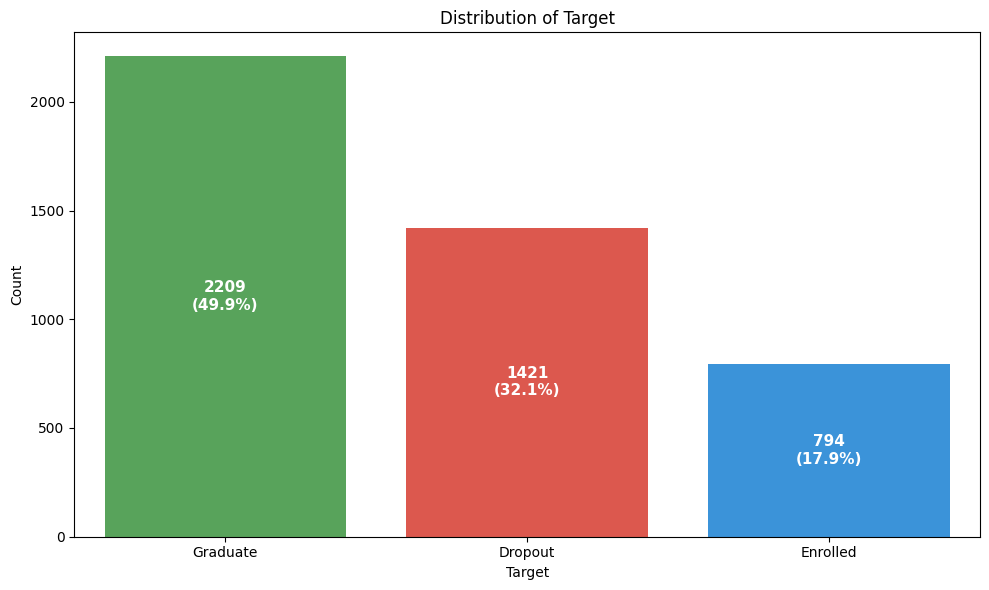

In [ ]:
variable = 'Target'  

# Print value counts
print(f"\n{variable}:")
counts = data[variable].value_counts()
print(counts)
percentages = 100 * counts / counts.sum()
print(f"\nPercentage distribution:")
print(percentages)

# Create plot
plt.figure(figsize=(10, 6))

# Custom colors for Target variable
if variable == 'Target':
    palette = {'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'}
    ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=palette, legend=False)
else:
    ax = sns.barplot(x=counts.index, y=counts.values)

# Add labels (this approach avoids the indexing error)
for i, (idx, val) in enumerate(counts.items()):
    percentage = percentages[idx]
    ax.text(i, val/2, f'{val}\n({percentage:.1f}%)', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

plt.title(f'Distribution of {variable}')
plt.ylabel('Count')
plt.xticks(rotation=45 if len(counts) > 5 else 0)
plt.tight_layout()
plt.show()

### Marital Status Variable


Marital status:
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


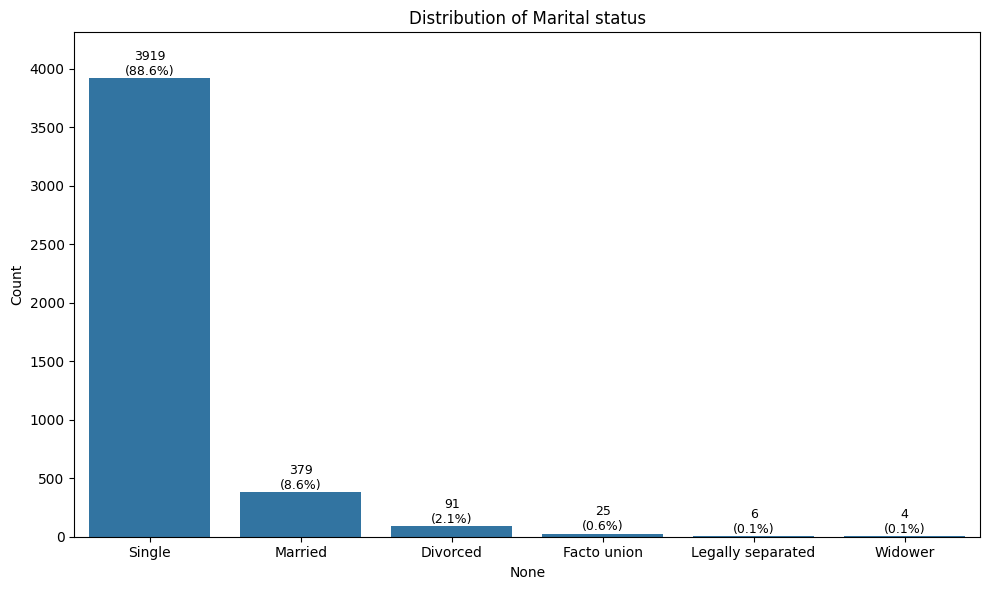

<Figure size 1200x600 with 0 Axes>

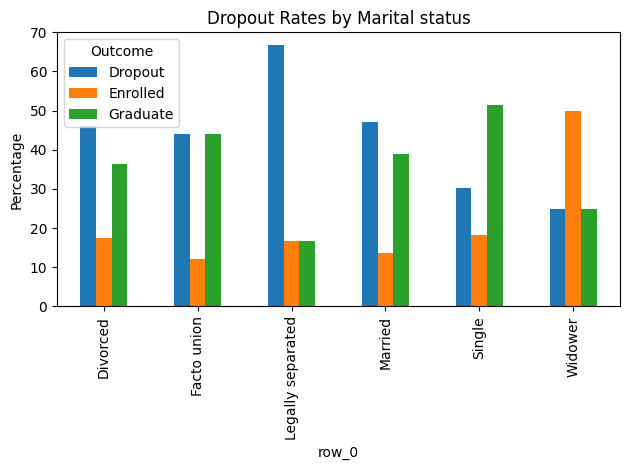

In [ ]:
# Analyze Marital Status
variable = 'Marital status'

# Create a mapping dictionary
marital_status_labels = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

# Get value counts
counts = data[variable].value_counts()
print(f"\n{variable}:")
print(counts)

# Create a Series with better labels for plotting
counts_labeled = pd.Series(
    counts.values, 
    index=[marital_status_labels.get(idx, str(idx)) for idx in counts.index]
)

# Create plot with labeled x-axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts_labeled.index, y=counts_labeled.values)

# Add percentage labels
total = len(data[variable])
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    ax.text(i, p.get_height() + 30, 
            f'{int(p.get_height())}\n({percentage:.1f}%)', 
            ha='center', fontsize=9)

plt.title(f'Distribution of {variable}')
plt.ylabel('Count')
plt.ylim(0, counts.max() * 1.1)
plt.tight_layout()
plt.show()

# Now show relationship with Target
plt.figure(figsize=(12, 6))
crosstab = pd.crosstab(
    index=[marital_status_labels.get(idx, str(idx)) for idx in data[variable]], 
    columns=data['Target'], 
    normalize='index'
) * 100
crosstab.plot(kind='bar')
plt.title(f'Dropout Rates by {variable}')
plt.ylabel('Percentage')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

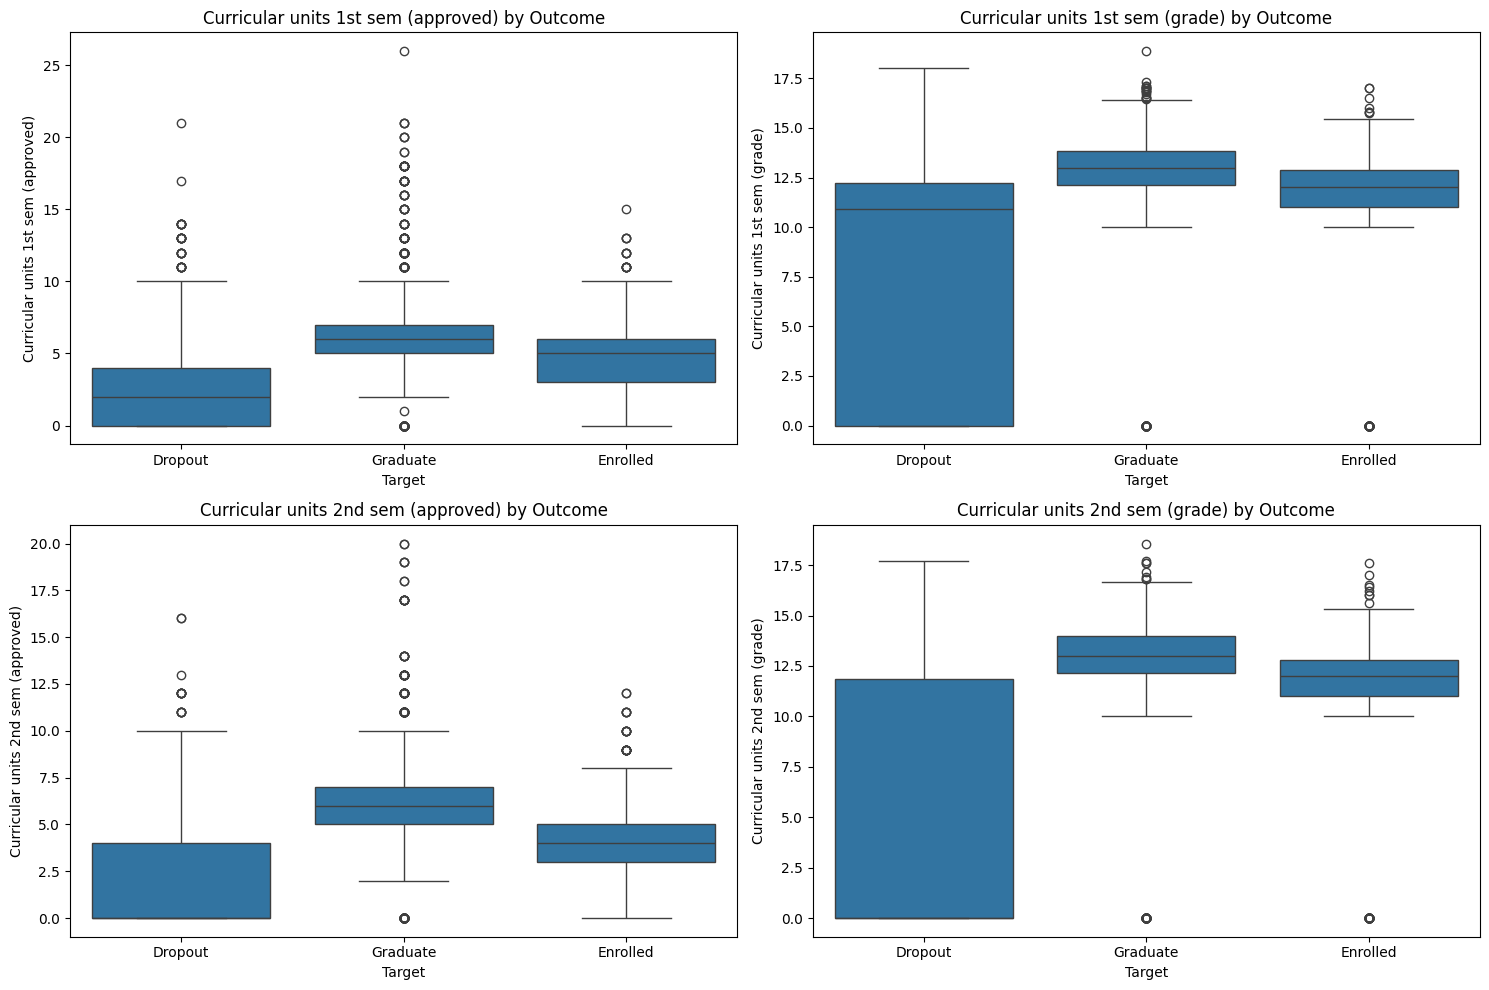

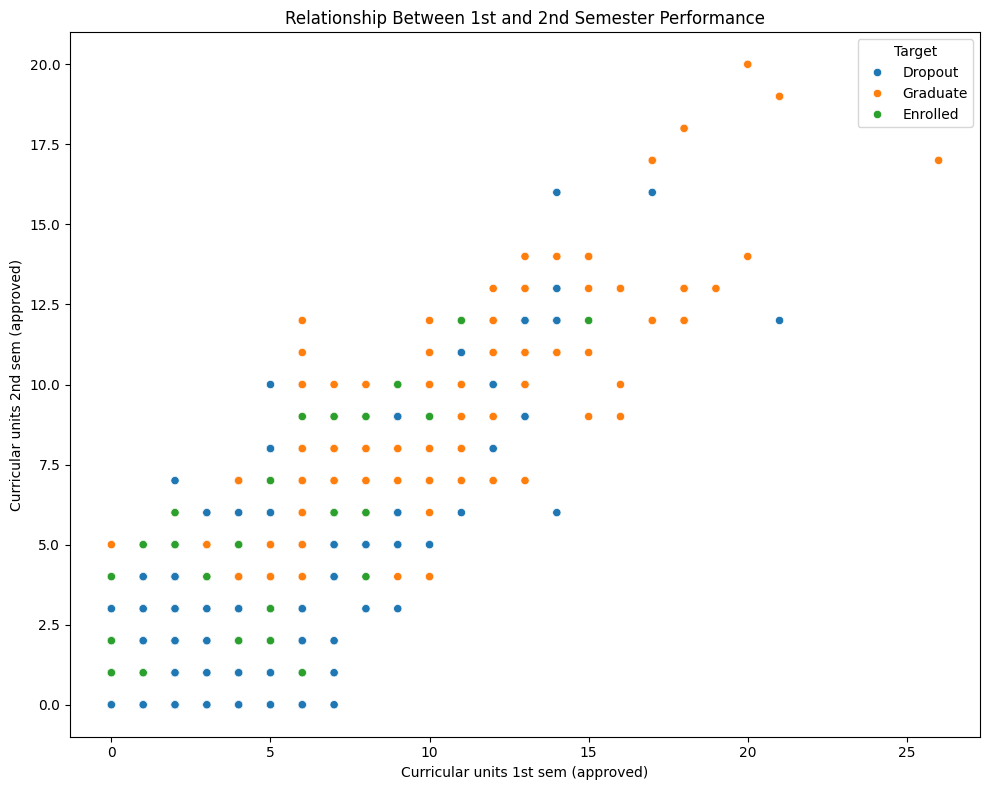

In [7]:
# Examine academic performance variables
academic_vars = ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

# Create boxplots to compare performance by target group
plt.figure(figsize=(15, 10))
for i, var in enumerate(academic_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Target', y=var, data=data)
    plt.title(f'{var} by Outcome')
plt.tight_layout()
plt.show()

# Correlation between 1st and 2nd semester performance
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Curricular units 1st sem (approved)', 
                y='Curricular units 2nd sem (approved)', 
                hue='Target', data=data)
plt.title('Relationship Between 1st and 2nd Semester Performance')
plt.tight_layout()
plt.show()

In [8]:
# Analyzing dropouts with zero grades in curricular units
# First, let's filter to only include dropout students
dropout_data = data[data['Target'] == 'Dropout']

# Check how many dropout students had zero grade in first semester
first_sem_zero_grade = dropout_data[dropout_data['Curricular units 1st sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 1st semester: {len(first_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(first_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in second semester
second_sem_zero_grade = dropout_data[dropout_data['Curricular units 2nd sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 2nd semester: {len(second_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(second_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in BOTH semesters
both_sem_zero_grade = dropout_data[(dropout_data['Curricular units 1st sem (grade)'] == 0.0) & 
                                  (dropout_data['Curricular units 2nd sem (grade)'] == 0.0)]
print(f"Dropouts with zero grade in BOTH semesters: {len(both_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(both_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Visualize these findings
categories = ['1st Sem Zero Grade', '2nd Sem Zero Grade', 'Both Sem Zero Grade']
values = [len(first_sem_zero_grade), len(second_sem_zero_grade), len(both_sem_zero_grade)]
percentages = [v/len(dropout_data)*100 for v in values]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color='tomato')
plt.ylabel('Percentage of Dropout Students')
plt.title('Percentage of Dropout Students with Zero G

SyntaxError: unterminated string literal (detected at line 29) (418543233.py, line 29)

Dropouts with zero grade in 1st semester: 570 out of 1421 dropouts
Percentage: 40.11%
Dropouts with zero grade in 2nd semester: 727 out of 1421 dropouts
Percentage: 51.16%
Dropouts with zero grade in BOTH semesters: 546 out of 1421 dropouts
Percentage: 38.42%


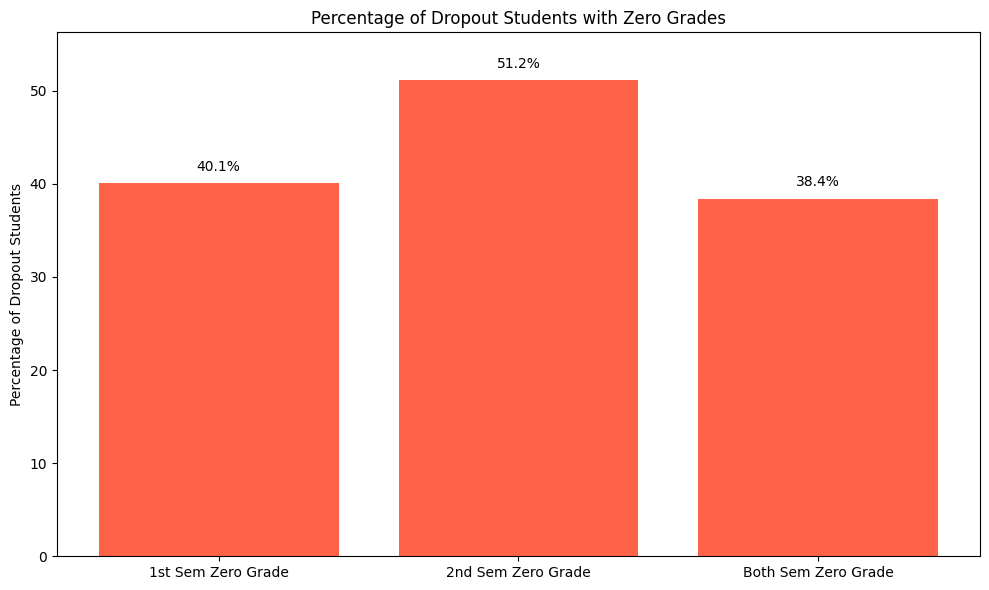

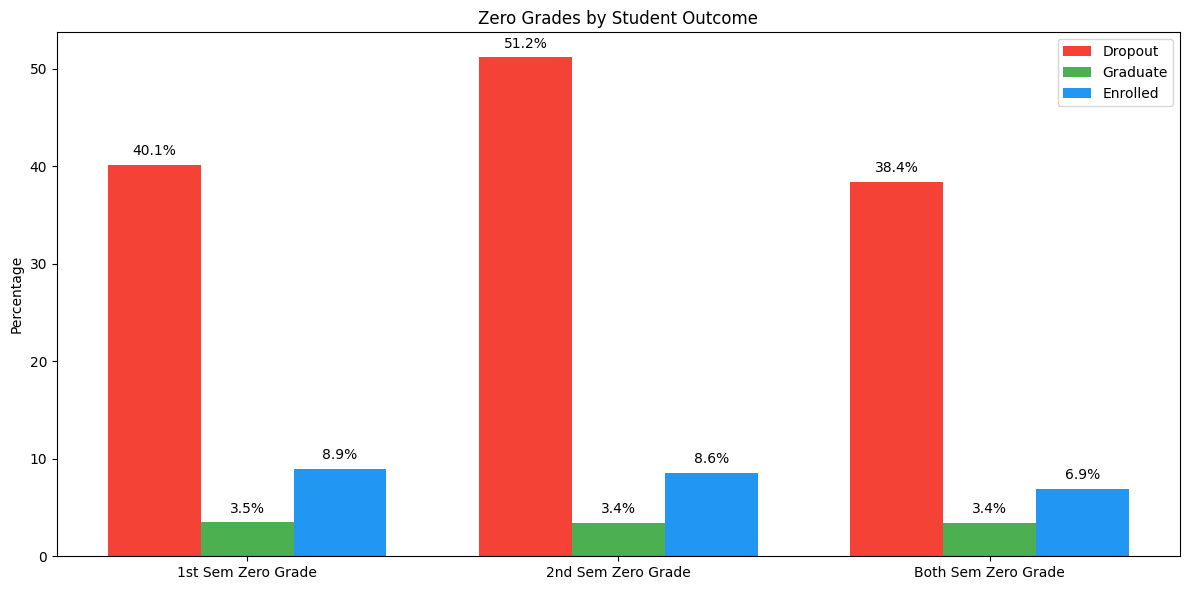

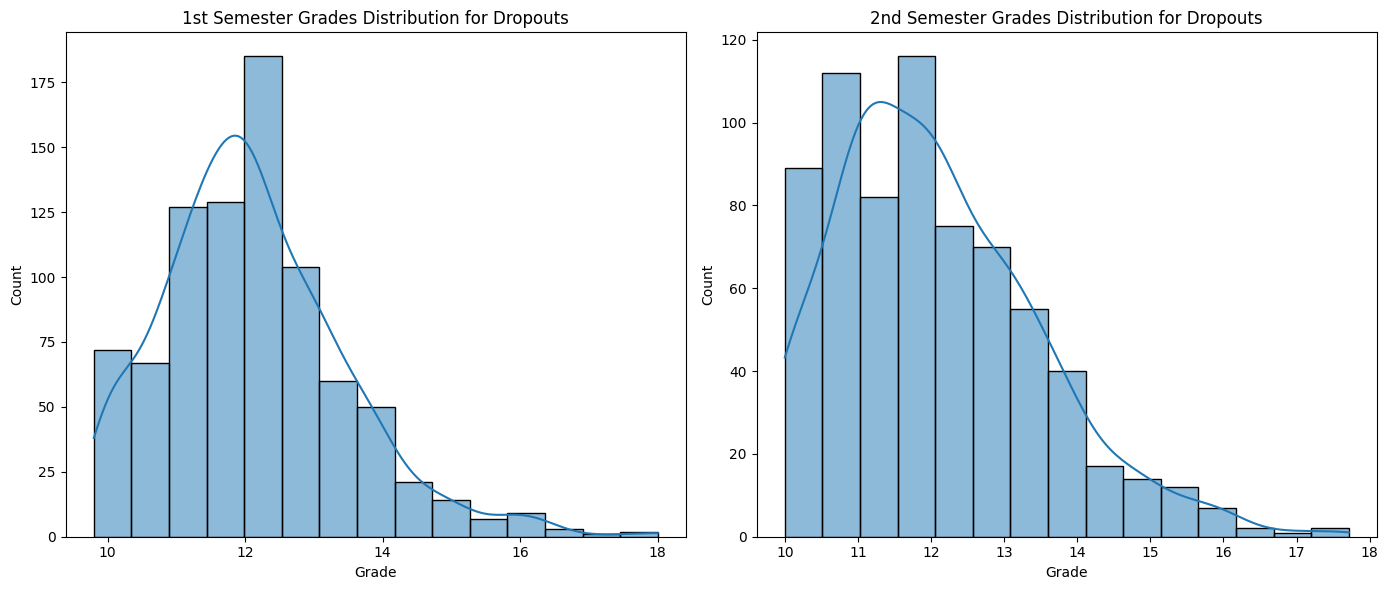

In [9]:
# Analyzing dropouts with zero grades in curricular units
# First, let's filter to only include dropout students
dropout_data = data[data['Target'] == 'Dropout']

# Check how many dropout students had zero grade in first semester
first_sem_zero_grade = dropout_data[dropout_data['Curricular units 1st sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 1st semester: {len(first_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(first_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in second semester
second_sem_zero_grade = dropout_data[dropout_data['Curricular units 2nd sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 2nd semester: {len(second_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(second_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in BOTH semesters
both_sem_zero_grade = dropout_data[(dropout_data['Curricular units 1st sem (grade)'] == 0.0) & 
                                  (dropout_data['Curricular units 2nd sem (grade)'] == 0.0)]
print(f"Dropouts with zero grade in BOTH semesters: {len(both_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(both_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Visualize these findings
categories = ['1st Sem Zero Grade', '2nd Sem Zero Grade', 'Both Sem Zero Grade']
values = [len(first_sem_zero_grade), len(second_sem_zero_grade), len(both_sem_zero_grade)]
percentages = [v/len(dropout_data)*100 for v in values]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color='tomato')
plt.ylabel('Percentage of Dropout Students')
plt.title('Percentage of Dropout Students with Zero Grades')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom')

plt.ylim(0, max(percentages) * 1.1)  # Add some space above bars for labels
plt.tight_layout()
plt.show()

# Let's also compare with non-dropout students for context
# Create a function to calculate zero grade rates by target group
def zero_grade_rates(target_group):
    target_data = data[data['Target'] == target_group]
    first_zero_grade = len(target_data[target_data['Curricular units 1st sem (grade)'] == 0.0])/len(target_data)*100
    second_zero_grade = len(target_data[target_data['Curricular units 2nd sem (grade)'] == 0.0])/len(target_data)*100
    both_zero_grade = len(target_data[(target_data['Curricular units 1st sem (grade)'] == 0.0) & 
                                     (target_data['Curricular units 2nd sem (grade)'] == 0.0)])/len(target_data)*100
    return first_zero_grade, second_zero_grade, both_zero_grade

# Calculate rates for each target group
dropout_rates = zero_grade_rates('Dropout')
graduate_rates = zero_grade_rates('Graduate')
enrolled_rates = zero_grade_rates('Enrolled')

# Create a comparison plot
labels = ['1st Sem Zero Grade', '2nd Sem Zero Grade', 'Both Sem Zero Grade']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, dropout_rates, width, label='Dropout', color='#F44336')
plt.bar(x, graduate_rates, width, label='Graduate', color='#4CAF50')
plt.bar(x + width, enrolled_rates, width, label='Enrolled', color='#2196F3')

plt.ylabel('Percentage')
plt.title('Zero Grades by Student Outcome')
plt.xticks(x, labels)
plt.legend()

# Add percentage labels
for i, v in enumerate(dropout_rates):
    plt.text(i - width, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(graduate_rates):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(enrolled_rates):
    plt.text(i + width, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Let's also look at grade distribution for dropout students
plt.figure(figsize=(14, 6))

# First semester grade distribution
plt.subplot(1, 2, 1)
dropout_grades_1st = dropout_data['Curricular units 1st sem (grade)']
dropout_grades_1st = dropout_grades_1st[dropout_grades_1st > 0]  # Filter out zeros for better visualization
sns.histplot(dropout_grades_1st, kde=True, bins=15)
plt.title('1st Semester Grades Distribution for Dropouts')
plt.xlabel('Grade')

# Second semester grade distribution
plt.subplot(1, 2, 2)
dropout_grades_2nd = dropout_data['Curricular units 2nd sem (grade)']
dropout_grades_2nd = dropout_grades_2nd[dropout_grades_2nd > 0]  # Filter out zeros for better visualization
sns.histplot(dropout_grades_2nd, kde=True, bins=15)
plt.title('2nd Semester Grades Distribution for Dropouts')
plt.xlabel('Grade')

plt.tight_layout()
plt.show()

GPA Statistics:
count    3748.000000
mean       12.691439
std         1.265827
min         9.800000
25%        11.777778
50%        12.600000
75%        13.512890
max        18.086538
Name: GPA, dtype: float64

Completion Rate Statistics:
count    4244.000000
mean        0.707877
std         0.340836
min         0.000000
25%         0.571429
50%         0.857143
75%         1.000000
max         1.000000
Name: completion_rate, dtype: float64


C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_1304\1559198563.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='GPA', data=data,
C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_1304\1559198563.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='completion_rate', data=data,


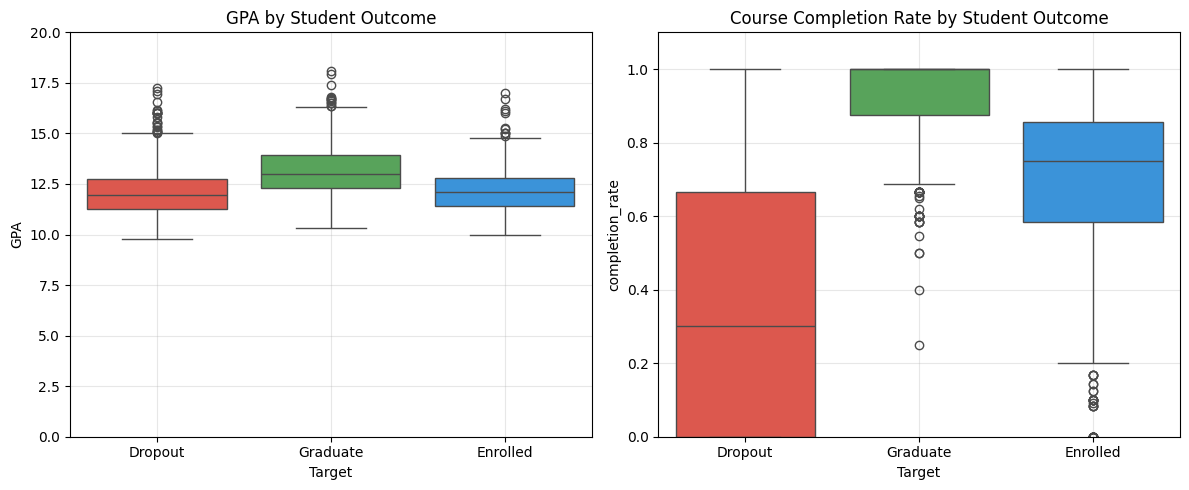

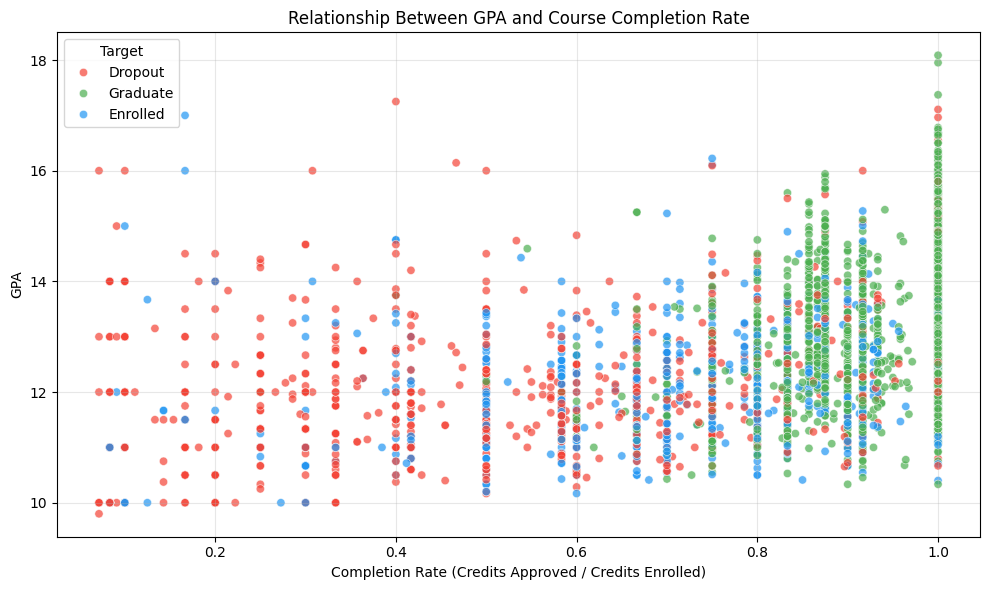


Academic Performance Categories by Student Outcome:
Target                     Dropout  Enrolled  Graduate
academic_performance                                  
High GPA, High Completion      194       297      1763
High GPA, Low Completion       237       104        18
Low GPA, High Completion       106       174       329
Low GPA, Low Completion        338       164        24
Missing data                   546        55        75

Percentage within each Student Outcome:
Target                     Dropout  Enrolled  Graduate
academic_performance                                  
High GPA, High Completion     13.7      37.4      79.8
High GPA, Low Completion      16.7      13.1       0.8
Low GPA, High Completion       7.5      21.9      14.9
Low GPA, Low Completion       23.8      20.7       1.1
Missing data                  38.4       6.9       3.4


<Figure size 1200x600 with 0 Axes>

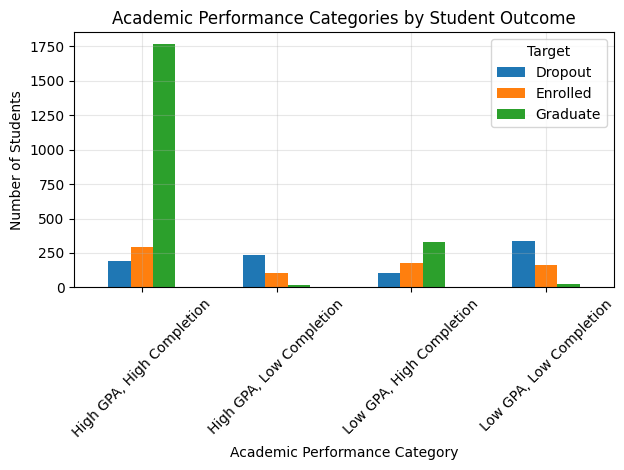

In [10]:
# Calculate a more accurate GPA using credits and grades from both semesters

# First, let's create helper columns for our calculation
# Credits attempted = Curricular units (enrolled)
# Credits completed = Curricular units (approved)
# Grade = Curricular units (grade)

# Create GPA column
data['GPA'] = np.nan  # Initialize with NaN

# Calculate weighted GPA for students who have credits in either semester
# Formula: Sum(Grade × Credits) / Sum(Credits)

# Filter for students with approved credits in at least one semester
has_credits = (data['Curricular units 1st sem (approved)'] > 0) | (data['Curricular units 2nd sem (approved)'] > 0)
data_with_credits = data[has_credits].copy()

# Calculate weighted sum of grades
data_with_credits['weighted_grade_sum'] = (
    data_with_credits['Curricular units 1st sem (grade)'] * data_with_credits['Curricular units 1st sem (approved)'] +
    data_with_credits['Curricular units 2nd sem (grade)'] * data_with_credits['Curricular units 2nd sem (approved)']
)

# Calculate total credits earned
data_with_credits['total_credits_earned'] = (
    data_with_credits['Curricular units 1st sem (approved)'] + 
    data_with_credits['Curricular units 2nd sem (approved)']
)

# Calculate GPA
data_with_credits['GPA'] = data_with_credits['weighted_grade_sum'] / data_with_credits['total_credits_earned']

# Update the original dataframe
data.loc[has_credits, 'GPA'] = data_with_credits['GPA']

# Let's also calculate the course completion rate (credits approved / credits enrolled)
data['completion_rate'] = np.nan

# Filter for students who enrolled in at least one course
enrolled_in_courses = (data['Curricular units 1st sem (enrolled)'] > 0) | (data['Curricular units 2nd sem (enrolled)'] > 0)
data_enrolled = data[enrolled_in_courses].copy()

# Calculate total credits enrolled and approved
data_enrolled['total_credits_enrolled'] = (
    data_enrolled['Curricular units 1st sem (enrolled)'] +
    data_enrolled['Curricular units 2nd sem (enrolled)']
)

data_enrolled['total_credits_approved'] = (
    data_enrolled['Curricular units 1st sem (approved)'] +
    data_enrolled['Curricular units 2nd sem (approved)']
)

# Calculate completion rate
data_enrolled['completion_rate'] = data_enrolled['total_credits_approved'] / data_enrolled['total_credits_enrolled']

# Update the original dataframe
data.loc[enrolled_in_courses, 'completion_rate'] = data_enrolled['completion_rate']

# Display summary statistics for our new metrics
print("GPA Statistics:")
print(data['GPA'].describe())

print("\nCompletion Rate Statistics:")
print(data['completion_rate'].describe())

# Visualize GPA by student outcome
plt.figure(figsize=(12, 5))

# GPA Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='GPA', data=data, 
            palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'})
plt.title('GPA by Student Outcome')
plt.ylim(0, 20)  # Based on the Portuguese grading system (0-20)
plt.grid(alpha=0.3)

# Completion Rate Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Target', y='completion_rate', data=data,
            palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'})
plt.title('Course Completion Rate by Student Outcome')
plt.ylim(0, 1.1)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Create a scatter plot showing relationship between GPA and completion rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='completion_rate', y='GPA', hue='Target', data=data,
                palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'},
                alpha=0.7)
plt.title('Relationship Between GPA and Course Completion Rate')
plt.xlabel('Completion Rate (Credits Approved / Credits Enrolled)')
plt.ylabel('GPA')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate thresholds for "good" academic performance
# (These can be adjusted based on your understanding of the grading system)
gpa_threshold = 12  # Assuming passing grade is 10 in a 0-20 scale
completion_threshold = 0.7  # 70% course completion

# Create categories based on thresholds
data['academic_performance'] = 'Missing data'
data.loc[~data['GPA'].isna() & ~data['completion_rate'].isna(), 'academic_performance'] = 'Low GPA, Low Completion'
data.loc[(data['GPA'] >= gpa_threshold) & (data['completion_rate'] < completion_threshold), 'academic_performance'] = 'High GPA, Low Completion'
data.loc[(data['GPA'] < gpa_threshold) & (data['completion_rate'] >= completion_threshold), 'academic_performance'] = 'Low GPA, High Completion'
data.loc[(data['GPA'] >= gpa_threshold) & (data['completion_rate'] >= completion_threshold), 'academic_performance'] = 'High GPA, High Completion'

# Count students in each category by outcome
performance_by_outcome = pd.crosstab(data['academic_performance'], data['Target'])
print("\nAcademic Performance Categories by Student Outcome:")
print(performance_by_outcome)

# Calculate percentages within each target group
performance_pct = pd.crosstab(data['academic_performance'], data['Target'], normalize='columns') * 100
print("\nPercentage within each Student Outcome:")
print(performance_pct.round(1))

# Visualize the academic performance categories
plt.figure(figsize=(12, 6))
performance_by_outcome.drop('Missing data', errors='ignore').plot(kind='bar')
plt.title('Academic Performance Categories by Student Outcome')
plt.ylabel('Number of Students')
plt.xlabel('Academic Performance Category')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [2]:
# Create a function to make the data accessible to other files
# Essentially the ability to jump into another file (like dimensions) and keep working with the data
def get_student_data():
    return data